C:\Users\domin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys


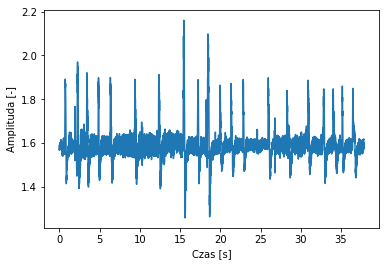

C:\Users\domin\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


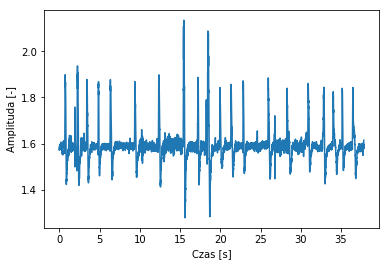

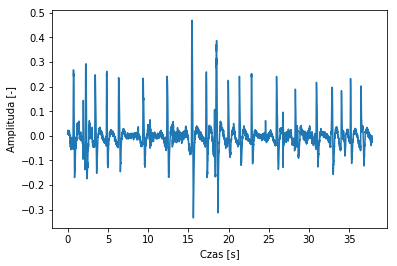

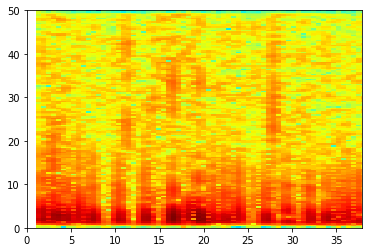

Wymrugane liczby to: [1, 2, 3, 4, 5, 2, 4, 1, 2, 3, 4, 5, 1, 2, 3, 4, 1, 2, 3, 4, 5]


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import aseegg as ag
dane=pd.read_csv("C:/Users/domin/desktop/sygnal/sub-007_trial-06.csv",delimiter=',',engine='python')
t = np.linspace (0, 37.84, 200*37.84)
sygnal=dane['kolumna2']
zakod_liczby=dane['kolumna6']
plt.plot(t, sygnal)
plt.xlabel("Czas [s]")
plt.ylabel("Amplituda [-]")
plt.show()
filtered=ag.pasmowozaporowy(sygnal, 200, 49, 51)
plt.plot(t,filtered)
plt.xlabel("Czas [s]")
plt.ylabel("Amplituda [-]")
plt.show()
filtered2=ag.pasmowoprzepustowy(filtered, 200,1, 50)
plt.plot(t,filtered2)
plt.xlabel("Czas [s]")
plt.ylabel("Amplituda [-]")
plt.show()
kod=[]
spektogram=ag.spektrogram(filtered2, 200)    
for i in range(1, 7568):
    if filtered2[i-1]>0.05:
        kod.append(zakod_liczby[i-1])
iteracja=0
for i in kod[:]:
    if iteracja==0:
        iteracja+=1
        warunek=i
    elif i==warunek:
        del kod[iteracja]
    elif i!=warunek:
        warunek=i
        iteracja+=1   
print("Wymrugane liczby to:",kod)